In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# path the dataset
dataset_path = '/content/sample_data/uiuc-gpa-dataset (1).csv'

df_head = pd.read_csv(dataset_path)
df_columns = df_head.columns.tolist()
print("current columns:", df_columns)
print("\n the first 5 rows:")
df_head.head()

current columns: ['Year', 'Term', 'YearTerm', 'Subject', 'Number', 'Course Title', 'Sched Type', 'A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F', 'W', 'Primary Instructor']

 the first 5 rows:


Year    Term YearTerm Subject  Number                  Course Title  \
0  2023  Spring  2023-sp     AAS     100  Intro Asian American Studies   
1  2023  Spring  2023-sp     AAS     100  Intro Asian American Studies   
2  2023  Spring  2023-sp     AAS     100  Intro Asian American Studies   
3  2023  Spring  2023-sp     AAS     200          U.S. Race and Empire   
4  2023  Spring  2023-sp     AAS     215  US Citizenship Comparatively   

  Sched Type  A+   A  A-  ...  B-  C+  C  C-  D+  D  D-  F  W  \
0        DIS   0  11   5  ...   0   0  0   0   0  0   0  1  0   
1        DIS   0  17   2  ...   1   0  0   0   0  0   0  0  1   
2        DIS   0  13   2  ...   2   0  0   1   0  0   0  1  0   
3        LCD   6  15   5  ...   0   0  0   0   0  1   0  1  0   
4        LCD  16  12   2  ...   1   0  0   0   0  0   0  0  0   

   Primary Instructor  
0       Shin, Jeongsu  
1       Shin, Jeongsu  
2      Lee, Sabrina Y  
3      Sawada, Emilia  
4        Kwon, Soo Ah  

[5 rows x 22 columns]

## Visualize the number of A, B, C, D, F, and W By Year

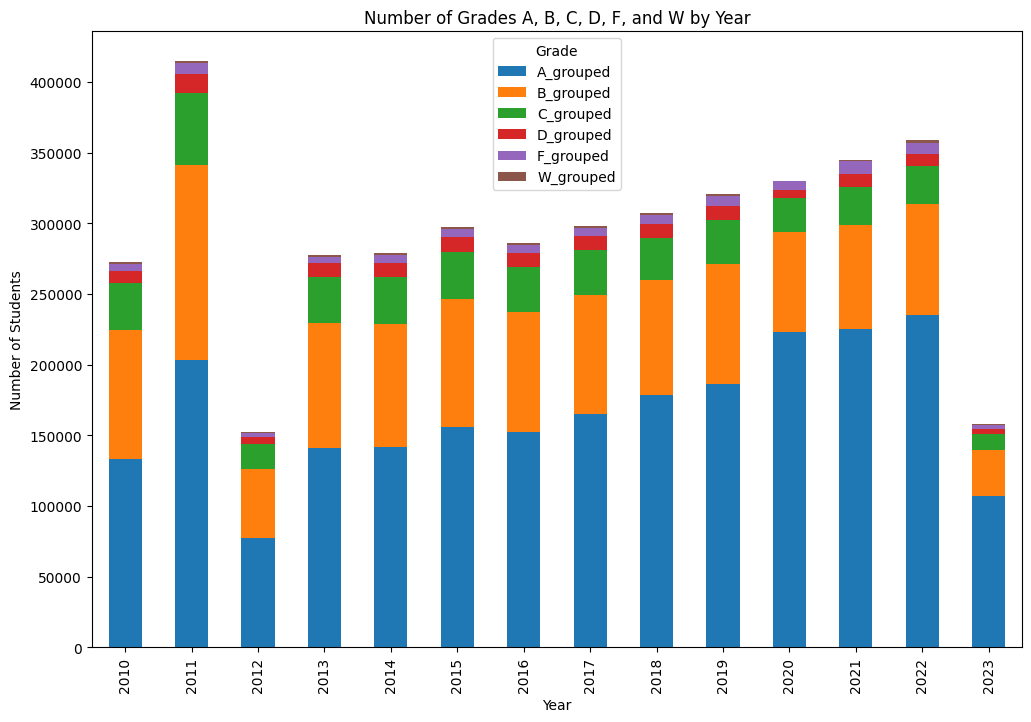

In [ ]:
# copy a df_head
df = df_head.copy()

df['A_grouped'] = df['A+'] + df['A'] + df['A-']
df['B_grouped'] = df['B+'] + df['B'] + df['B-']
df['C_grouped'] = df['C+'] + df['C'] + df['C-']
df['D_grouped'] = df['D+'] + df['D'] + df['D-']
df['F_grouped'] = df['F']
df['W_grouped'] = df['W']

df_agg = df.groupby('Year')[['A_grouped', 'B_grouped', 'C_grouped', 'D_grouped', 'F_grouped', 'W_grouped']].sum()

df_agg.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Number of Grades A, B, C, D, F, and W by Year')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend(title='Grade')
plt.show()


      A_grouped_percentage  B_grouped_percentage  C_grouped_percentage  \
Year                                                                     
2010             48.878246             33.504358             12.173227   
2011             48.949313             33.225280             12.269624   
2012             50.672016             32.129374             11.846779   
2013             50.863836             31.828090             11.837170   
2014             50.857276             31.289501             11.881703   
2015             52.445005             30.443154             11.370866   
2016             53.365149             29.651423             11.174044   
2017             55.474609             28.148185             10.567519   
2018             58.084782             26.521433              9.823935   
2019             58.240819             26.491310              9.654903   
2020             67.550084             21.438544              7.277821   
2021             65.215980            

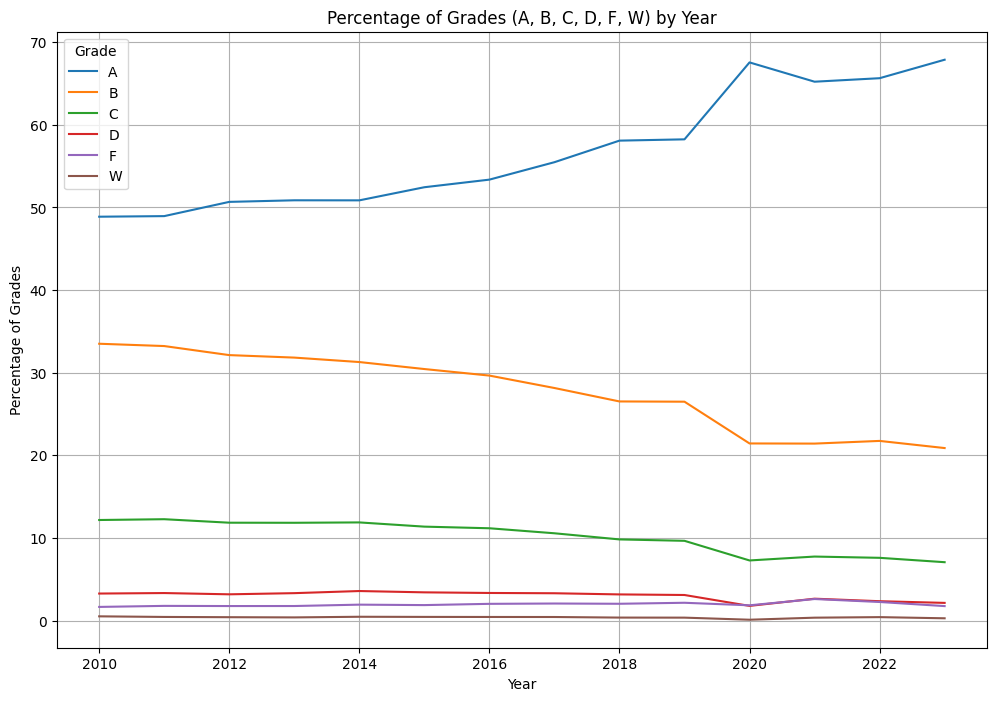

In [ ]:
df_yearly = df.groupby('Year')[['A_grouped', 'B_grouped', 'C_grouped', 'D_grouped', 'F_grouped', 'W_grouped']].sum()
df_yearly['Total_Grades'] = df_yearly.sum(axis=1)

for grade in ['A_grouped', 'B_grouped', 'C_grouped', 'D_grouped', 'F_grouped', 'W_grouped']:
    df_yearly[grade + '_percentage'] = (df_yearly[grade] / df_yearly['Total_Grades']) * 100

print(df_yearly[[grade + '_percentage' for grade in ['A_grouped', 'B_grouped', 'C_grouped', 'D_grouped', 'F_grouped', 'W_grouped']]])

plt.figure(figsize=(12, 8))
for grade in ['A_grouped', 'B_grouped', 'C_grouped', 'D_grouped', 'F_grouped', 'W_grouped']:
    plt.plot(df_yearly.index, df_yearly[grade + '_percentage'], label=grade.split('_')[0])

plt.title('Percentage of Grades (A, B, C, D, F, W) by Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Grades')
plt.legend(title='Grade')
plt.grid(True)
plt.show()

#### The trend of the number of As increase over year, as much as the trend of the number of B + C increases, while the other trends fluctuate very little

In [ ]:
overall_totals = df[['A_grouped', 'B_grouped', 'C_grouped', 'D_grouped', 'F_grouped', 'W_grouped']].sum()

total_grades_overall = overall_totals.sum()

overall_percentage = (overall_totals / total_grades_overall) * 100

print("Overall Grade Percentage Across All Years:")
print(overall_percentage)

Overall Grade Percentage Across All Years:
A_grouped    56.776123
B_grouped    27.701749
C_grouped    10.145802
D_grouped     2.998864
F_grouped     1.989706
W_grouped     0.387757
dtype: float64


In [ ]:
import matplotlib.offsetbox as offsetbox

def saver(fname):
    plt.savefig(fname+".png",bbox_inches="tight")

def textbox(txt,fname=None):
    plt.figure(figsize=(1,1))
    plt.gca().add_artist(offsetbox.AnchoredText("\n".join(txt), loc="center",prop=dict(size=30)))
    plt.axis('off')
    if fname is not None:
        saver(fname)
    plt.show()
    plt.close()

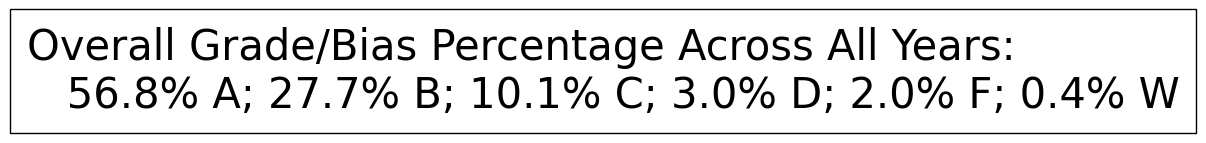

In [ ]:
overall_percentage = (overall_totals / total_grades_overall)


text = []
text.append("Overall Grade/Bias Percentage Across All Years:")
text.append("   {0:.1%} A; {1:.1%} B; {2:.1%} C; {3:.1%} D; {4:.1%} F; {5:.1%} W".format(
    overall_percentage['A_grouped'],
    overall_percentage['B_grouped'],
    overall_percentage['C_grouped'],
    overall_percentage['D_grouped'],
    overall_percentage['F_grouped'],
    overall_percentage['W_grouped']
))

textbox(text)

## Overall, we have 56.8% of data towards A, 27.7% of data towards B, and 10.1% of data towards C, followed by other D, F, and W. It also indicates bias towards certain grades in dataset


# We further investigated relationships between other features and grades

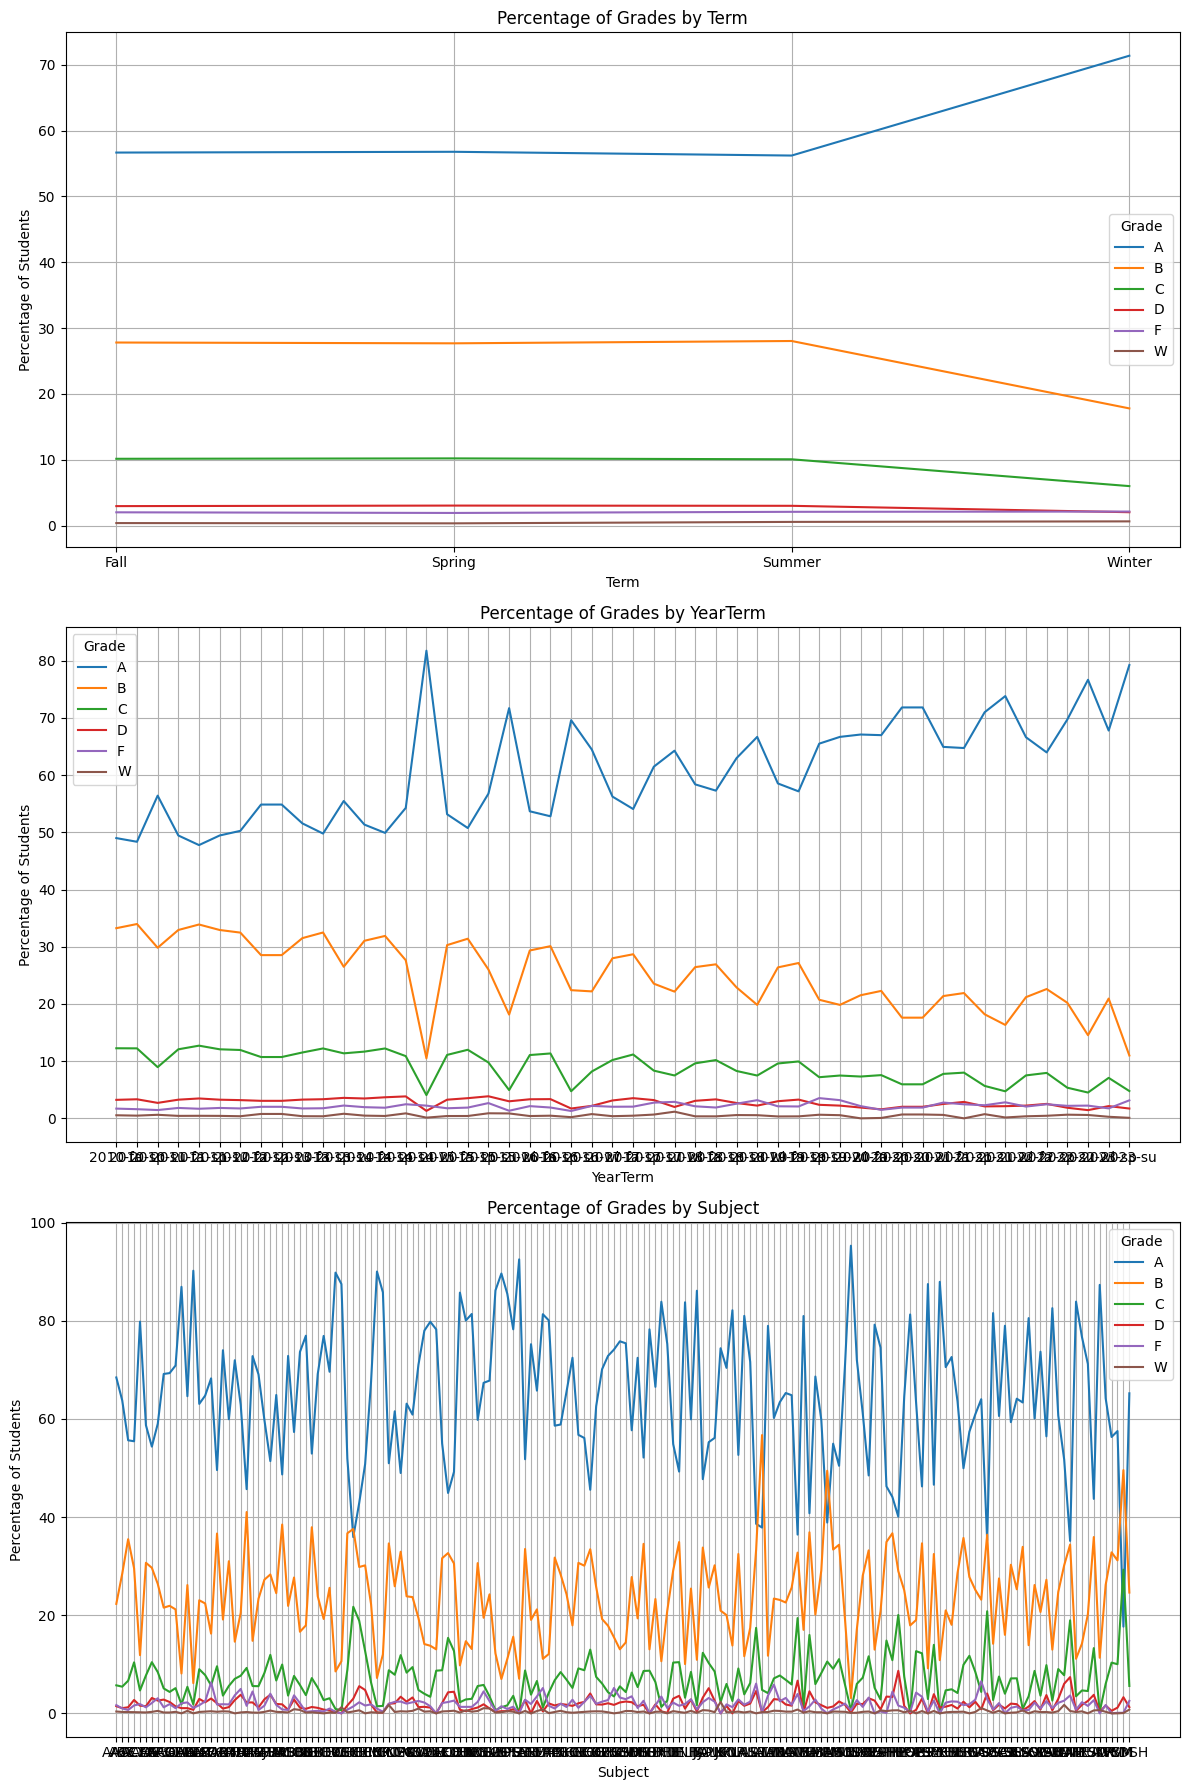

In [ ]:
df = df_head.copy()

df['A_grouped'] = df['A+'] + df['A'] + df['A-']
df['B_grouped'] = df['B+'] + df['B'] + df['B-']
df['C_grouped'] = df['C+'] + df['C'] + df['C-']
df['D_grouped'] = df['D+'] + df['D'] + df['D-']
df['F_grouped'] = df['F']
df['W_grouped'] = df['W']

def calculate_percentages(df, groupby_columns):
    df_grouped = df.groupby(groupby_columns)[['A_grouped', 'B_grouped', 'C_grouped', 'D_grouped', 'F_grouped', 'W_grouped']].sum()
    df_grouped['Total'] = df_grouped.sum(axis=1)
    for grade in ['A_grouped', 'B_grouped', 'C_grouped', 'D_grouped', 'F_grouped', 'W_grouped']:
        df_grouped[grade + '_percentage'] = (df_grouped[grade] / df_grouped['Total']) * 100
    return df_grouped

df_avg_term = calculate_percentages(df, ['Term'])
df_avg_yearterm = calculate_percentages(df, ['YearTerm'])
df_avg_subject = calculate_percentages(df, ['Subject'])

fig, axes = plt.subplots(3, 1, figsize=(12, 18))

for grade in ['A_grouped_percentage', 'B_grouped_percentage', 'C_grouped_percentage', 'D_grouped_percentage', 'F_grouped_percentage', 'W_grouped_percentage']:
    axes[0].plot(df_avg_term.index, df_avg_term[grade], label=grade.split('_')[0])

axes[0].set_title('Percentage of Grades by Term')
axes[0].set_xlabel('Term')
axes[0].set_ylabel('Percentage of Students')
axes[0].legend(title='Grade')
axes[0].grid(True)

for grade in ['A_grouped_percentage', 'B_grouped_percentage', 'C_grouped_percentage', 'D_grouped_percentage', 'F_grouped_percentage', 'W_grouped_percentage']:
    axes[1].plot(df_avg_yearterm.index, df_avg_yearterm[grade], label=grade.split('_')[0])

axes[1].set_title('Percentage of Grades by YearTerm')
axes[1].set_xlabel('YearTerm')
axes[1].set_ylabel('Percentage of Students')
axes[1].legend(title='Grade')
axes[1].grid(True)

for grade in ['A_grouped_percentage', 'B_grouped_percentage', 'C_grouped_percentage', 'D_grouped_percentage', 'F_grouped_percentage', 'W_grouped_percentage']:
    axes[2].plot(df_avg_subject.index, df_avg_subject[grade], label=grade.split('_')[0])

axes[2].set_title('Percentage of Grades by Subject')
axes[2].set_xlabel('Subject')
axes[2].set_ylabel('Percentage of Students')
axes[2].legend(title='Grade')
axes[2].grid(True)

plt.tight_layout()
plt.show()


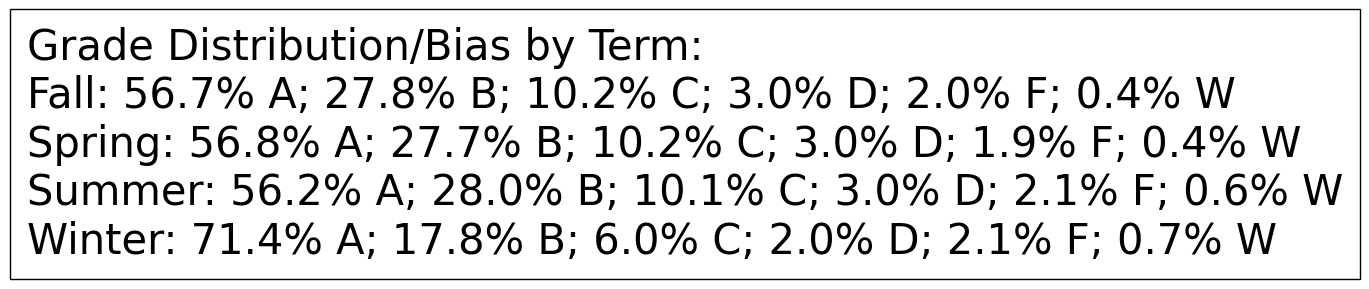

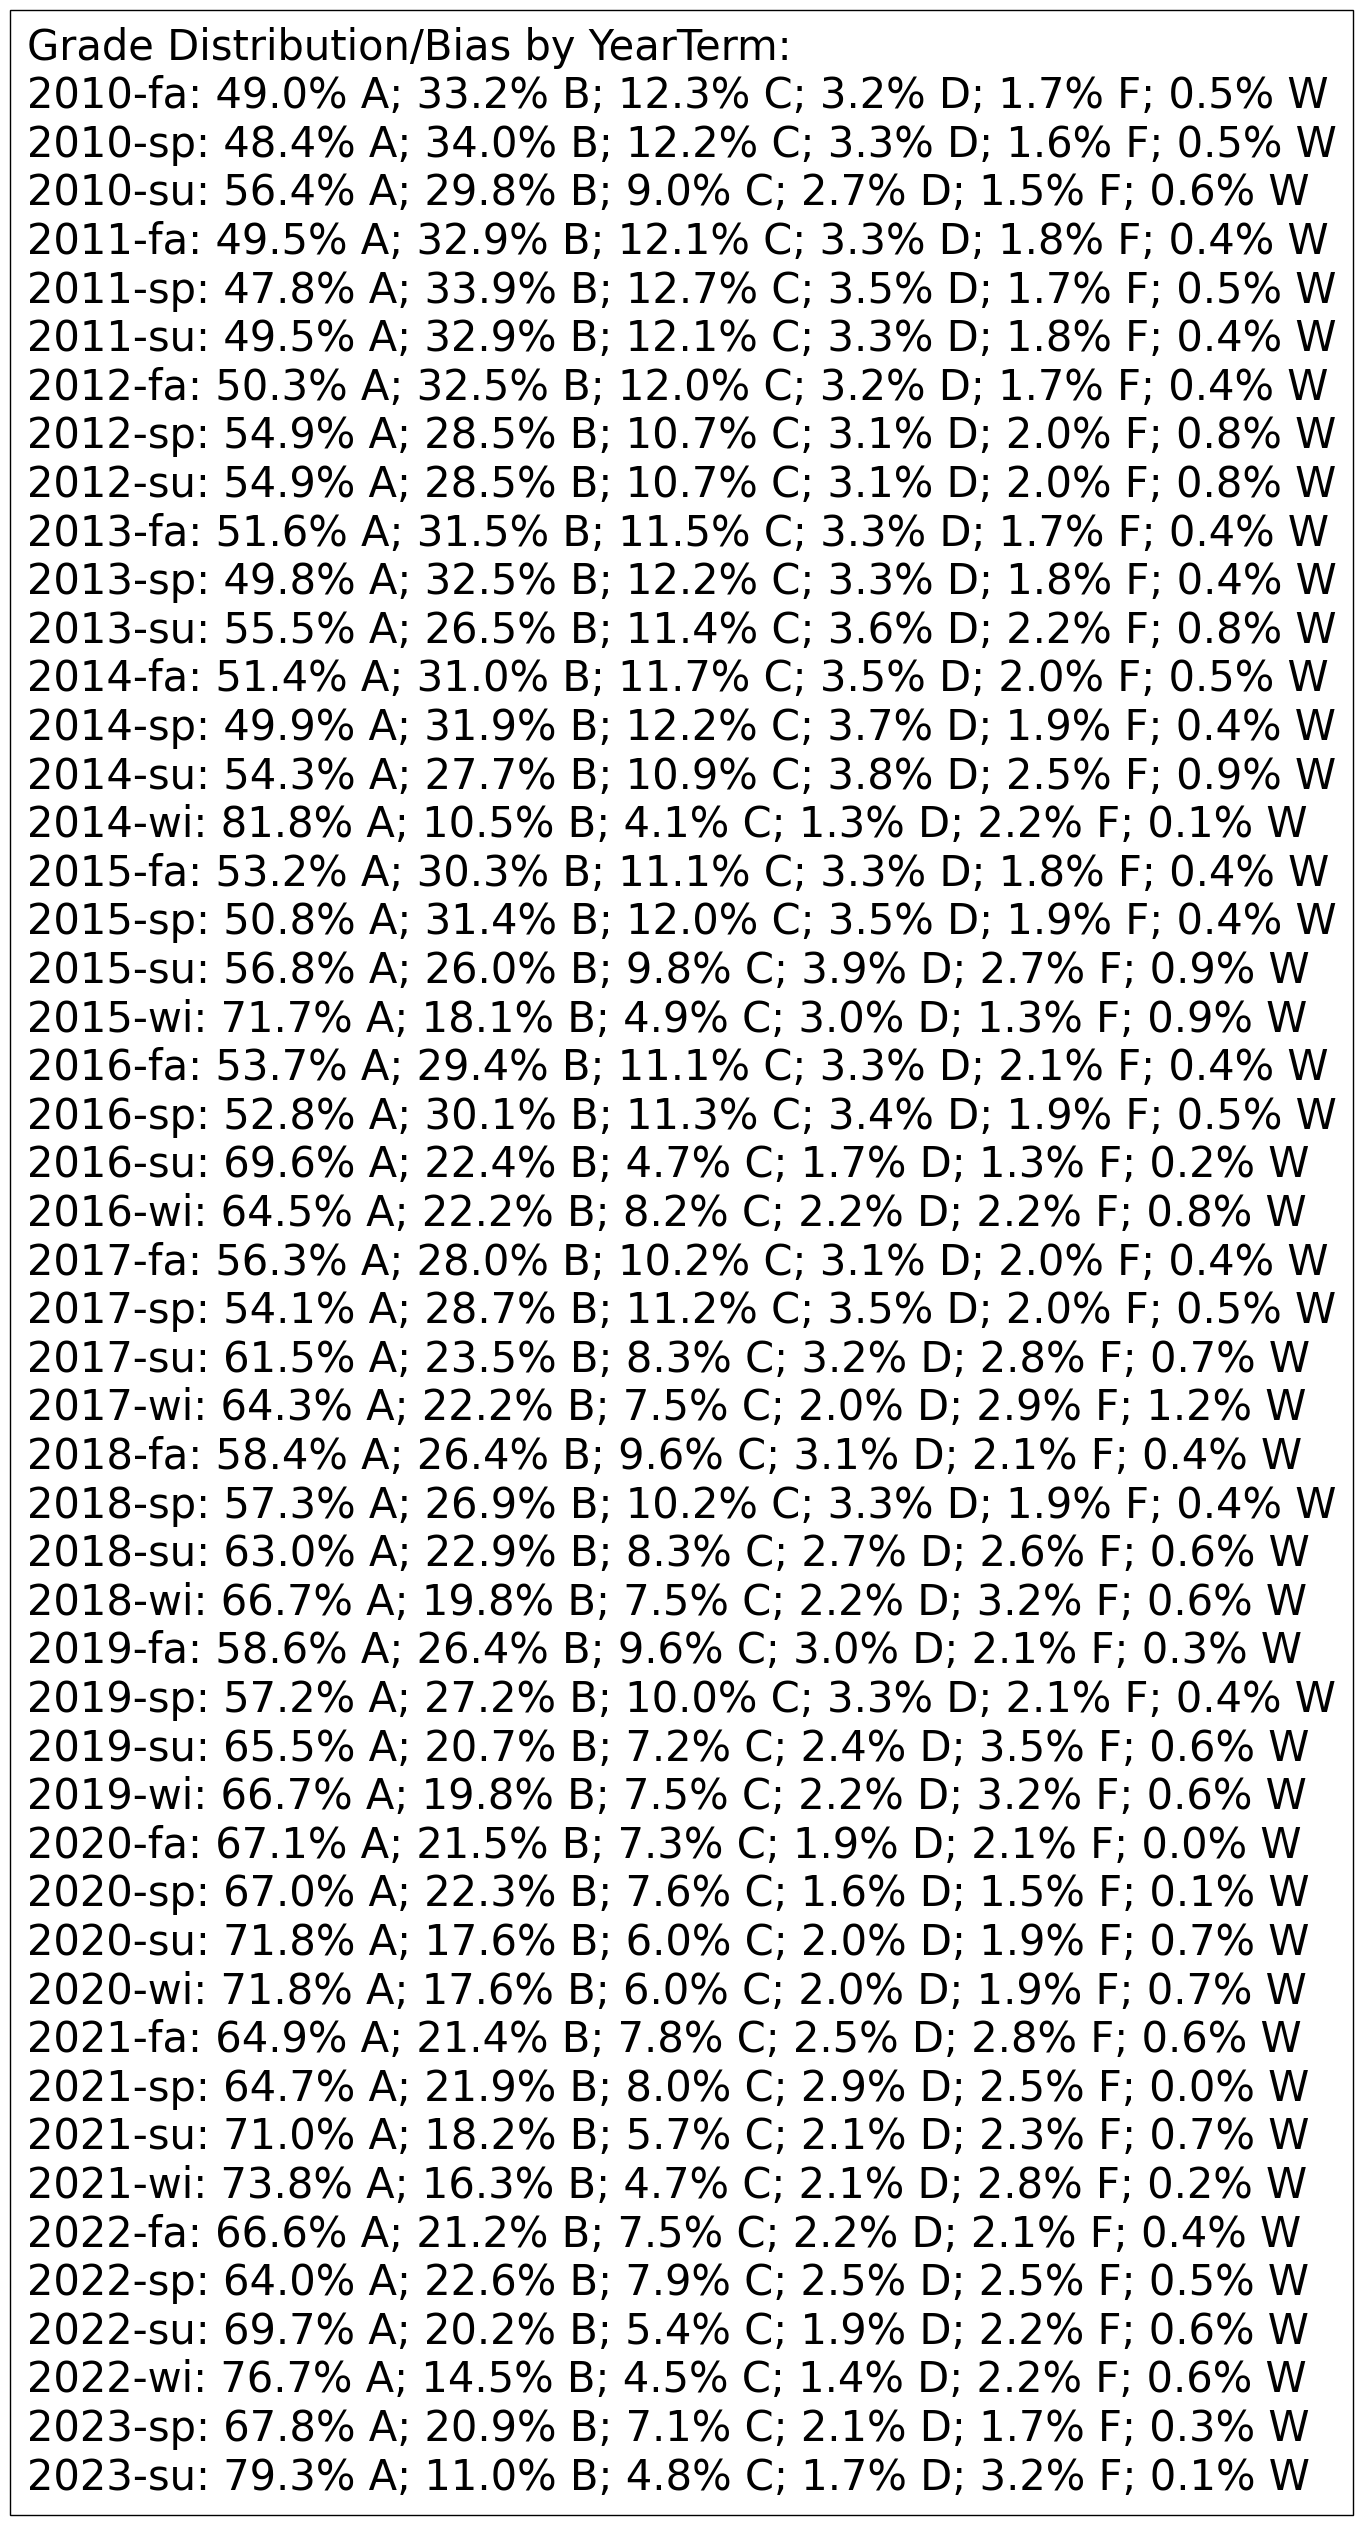

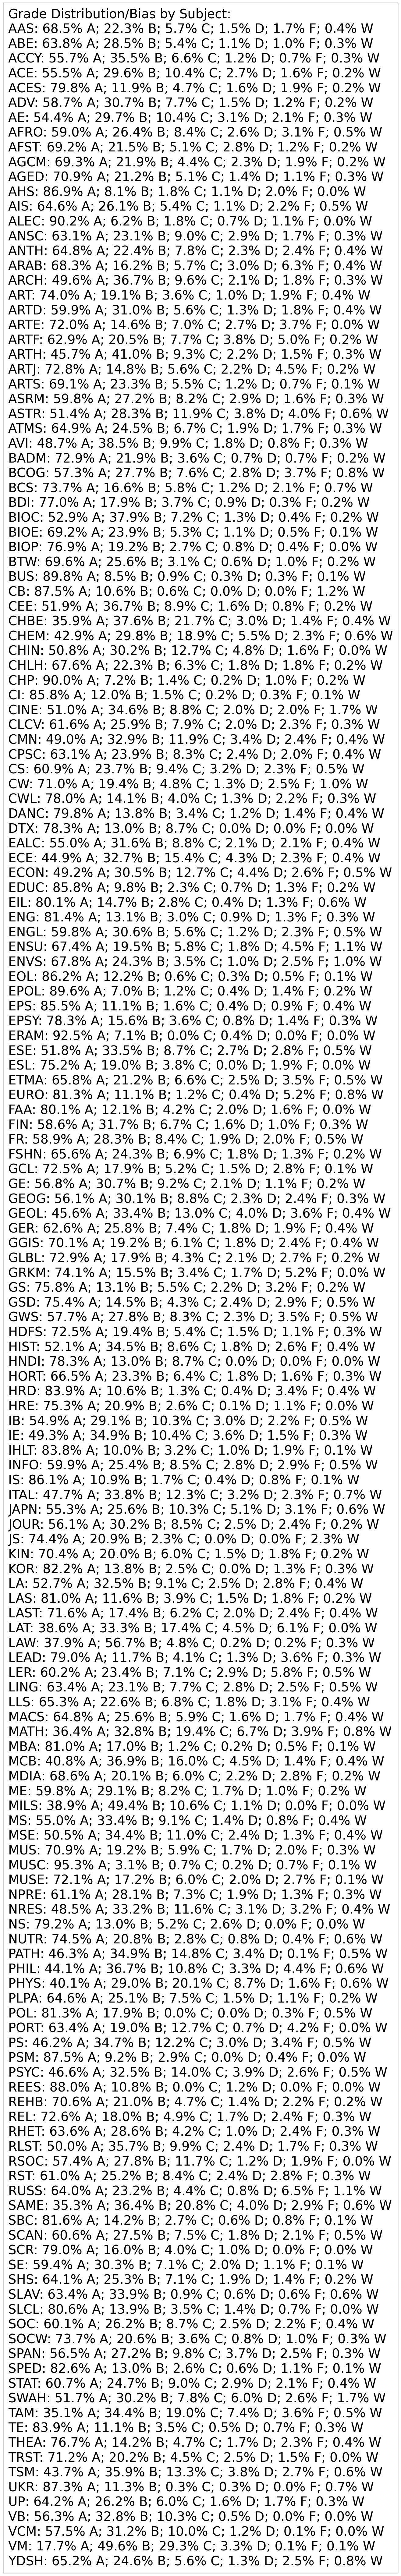

In [ ]:
df_avg_term = calculate_percentages(df, ['Term'])
df_avg_yearterm = calculate_percentages(df, ['YearTerm'])
df_avg_subject = calculate_percentages(df, ['Subject'])

def generate_text_summary(df, title):
    text = [f"{title}:"]
    for index, row in df.iterrows():
        text.append(f"{index}: {row['A_grouped_percentage']:.1f}% A; {row['B_grouped_percentage']:.1f}% B; "
                    f"{row['C_grouped_percentage']:.1f}% C; {row['D_grouped_percentage']:.1f}% D; "
                    f"{row['F_grouped_percentage']:.1f}% F; {row['W_grouped_percentage']:.1f}% W")
    return text

text_term = generate_text_summary(df_avg_term, "Grade Distribution/Bias by Term")
text_yearterm = generate_text_summary(df_avg_yearterm, "Grade Distribution/Bias by YearTerm")
text_subject = generate_text_summary(df_avg_subject, "Grade Distribution/Bias by Subject")


textbox(text_term, fname="term_summary")
textbox(text_yearterm, fname="yearterm_summary")
textbox(text_subject, fname="subject_summary")

# Interestingly, there ae some subjects where the percent of B is higher than the percent of A.

In [ ]:
df_avg_subject = calculate_percentages(df, ['Subject'])

subjects_higher_B = df_avg_subject[df_avg_subject['B_grouped_percentage'] > df_avg_subject['A_grouped_percentage']]

print("Subjects where the percentage of B grades is higher than the percentage of A grades:")
print(subjects_higher_B[['B_grouped_percentage', 'A_grouped_percentage']])

Subjects where the percentage of B grades is higher than the percentage of A grades:
         B_grouped_percentage  A_grouped_percentage
Subject                                            
CHBE                37.583683             35.927876
LAW                 56.720711             37.863289
MILS                49.444444             38.888889
SAME                36.416185             35.260116
VM                  49.578652             17.671093


## These are likely to play an role of outlier in data distribution.

VM - Veterinary Medicine

SAME - South Asian & Middle Eastern

MILS - Military Science

LAW - Law

CHBE - Chemical & Biomolecular Engineering

## Otherwise, with different degrees of percentage changes, the percent of A is higher than the percent of B, and the percent of B is higher than the percent of C, and so on.

To deal with numerical features, including A+, A, A, ..., W, we normalize them in the range of 0 and 1 by dividing the total number of students

In [ ]:
grade_columns = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F', 'W']

df_head['Total_Students'] = df_head[grade_columns].sum(axis=1)

for grade in grade_columns:
    df_head[grade] = df_head[grade] / df_head['Total_Students']

df_head.head()

Year    Term YearTerm Subject  Number                  Course Title  \
0  2023  Spring  2023-sp     AAS     100  Intro Asian American Studies   
1  2023  Spring  2023-sp     AAS     100  Intro Asian American Studies   
2  2023  Spring  2023-sp     AAS     100  Intro Asian American Studies   
3  2023  Spring  2023-sp     AAS     200          U.S. Race and Empire   
4  2023  Spring  2023-sp     AAS     215  US Citizenship Comparatively   

  Sched Type        A+         A        A-  ...   C+    C        C-   D+  \
0        DIS  0.000000  0.500000  0.227273  ...  0.0  0.0  0.000000  0.0   
1        DIS  0.000000  0.708333  0.083333  ...  0.0  0.0  0.000000  0.0   
2        DIS  0.000000  0.619048  0.095238  ...  0.0  0.0  0.047619  0.0   
3        LCD  0.181818  0.454545  0.151515  ...  0.0  0.0  0.000000  0.0   
4        LCD  0.484848  0.363636  0.060606  ...  0.0  0.0  0.000000  0.0   

          D   D-         F         W  Primary Instructor  Total_Students  
0  0.000000  0.0  0.045455  0.000000       Shin, Jeongsu              22  
1  0.000000  0.0  0.000000  0.041667       Shin, Jeongsu              24  
2  0.000000  0.0  0.047619  0.000000      Lee, Sabrina Y              21  
3  0.030303  0.0  0.030303  0.000000      Sawada, Emilia              33  
4  0.000000  0.0  0.000000  0.000000        Kwon, Soo Ah              33  

[5 rows x 23 columns]

In [ ]:
unique_instructors = df_head['Primary Instructor'].unique()
print("number of unique instructors:", len(unique_instructors))

print("number of data points:", len(df_head))

number of unique instructors: 9313
number of data points: 69069


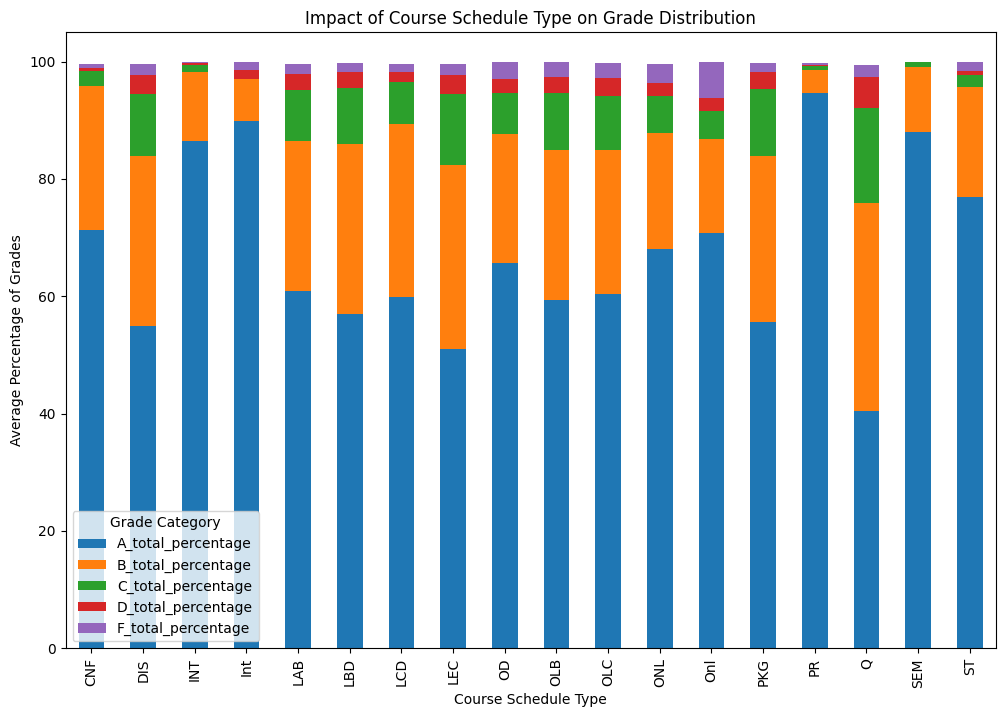

In [ ]:
# Group by Sched Type and calculate the average percentage for each grade category
df['Total_Students'] = df[grade_columns].sum(axis=1)

df['A_total_percentage'] = (df['A+'] + df['A'] + df['A-']) / df['Total_Students'] * 100
df['B_total_percentage'] = (df['B+'] + df['B'] + df['B-']) / df['Total_Students'] * 100
df['C_total_percentage'] = (df['C+'] + df['C'] + df['C-']) / df['Total_Students'] * 100
df['D_total_percentage'] = (df['D+'] + df['D'] + df['D-']) / df['Total_Students'] * 100
df['F_total_percentage'] = df['F'] / df['Total_Students'] * 100

# Group by Sched Type and calculate mean percentages for each grade category
sched_type_avg_grades = df.groupby('Sched Type')[['A_total_percentage', 'B_total_percentage',
                                                  'C_total_percentage', 'D_total_percentage',
                                                  'F_total_percentage']].mean()

# Plotting the impact of Sched Type on grade distribution
sched_type_avg_grades.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title("Impact of Course Schedule Type on Grade Distribution")
plt.xlabel("Course Schedule Type")
plt.ylabel("Average Percentage of Grades")
plt.legend(title="Grade Category")
plt.show()


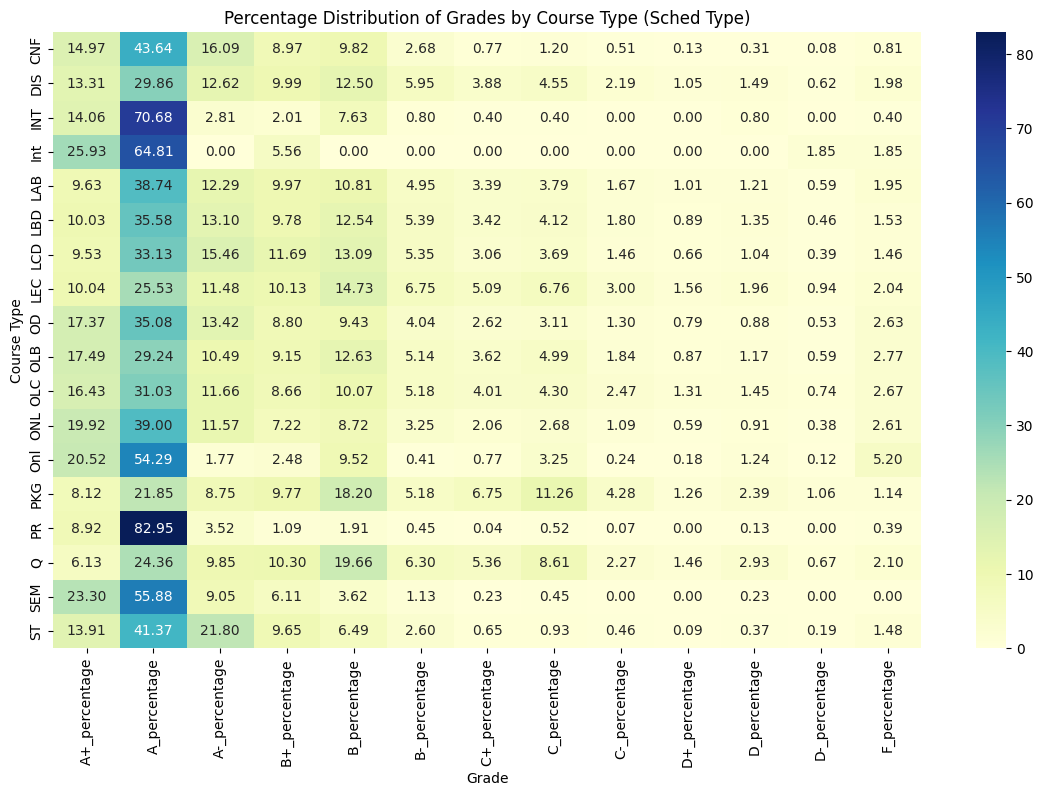

In [ ]:
import seaborn as sns

# Calculate the average percentage of each grade category per course type (Sched Type)
course_type_grades = df.groupby('Sched Type')[['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']].sum()

# Calculate total students per course type for normalization
course_type_grades['Total_Students'] = course_type_grades.sum(axis=1)

# Calculate the percentage of each grade category per course type
for grade in ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']:
    course_type_grades[grade + '_percentage'] = (course_type_grades[grade] / course_type_grades['Total_Students']) * 100

# Select only the percentage columns for the heatmap
course_type_grades_percentages = course_type_grades[[col for col in course_type_grades.columns if 'percentage' in col]]

# Plot a heatmap to visualize the correlation between course type and grades
plt.figure(figsize=(14, 8))
sns.heatmap(course_type_grades_percentages, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Percentage Distribution of Grades by Course Type (Sched Type)")
plt.xlabel("Grade")
plt.ylabel("Course Type")
plt.show()

In certain course types, the proportion of lower grades (C, D, F) is relatively high, such as in Q (Quiz) and ST (Special Topics) courses. The proportion of D and F grades is generally low, especially in common formats like LEC (Lecture) and LAB (Laboratory). However, in some specific types, such as ST (Special Topics) and PKG (Package), the proportion of D and F grades tends to be higher.

### we have 69069 datapoints (training + validation + test) in total, but there are 9313 unique primary instructors. It means that it is likely to lead the model to too high dimension to deal with. Therefore, we would like to drop the primary instructor feature.

### Also, YearTerm is dropped as well since it is already handled in "Term" and "Year"

Total_Students is also removed after it is used

In [ ]:

df_head = df_head.drop(columns=['Primary Instructor', 'Total_Students', 'YearTerm'])
df_head.head()

Year    Term Subject  Number                  Course Title Sched Type  \
0  2023  Spring     AAS     100  Intro Asian American Studies        DIS   
1  2023  Spring     AAS     100  Intro Asian American Studies        DIS   
2  2023  Spring     AAS     100  Intro Asian American Studies        DIS   
3  2023  Spring     AAS     200          U.S. Race and Empire        LCD   
4  2023  Spring     AAS     215  US Citizenship Comparatively        LCD   

         A+         A        A-        B+         B        B-   C+    C  \
0  0.000000  0.500000  0.227273  0.045455  0.181818  0.000000  0.0  0.0   
1  0.000000  0.708333  0.083333  0.041667  0.083333  0.041667  0.0  0.0   
2  0.000000  0.619048  0.095238  0.095238  0.000000  0.095238  0.0  0.0   
3  0.181818  0.454545  0.151515  0.060606  0.090909  0.000000  0.0  0.0   
4  0.484848  0.363636  0.060606  0.030303  0.030303  0.030303  0.0  0.0   

         C-   D+         D   D-         F         W  
0  0.000000  0.0  0.000000  0.0  0.045455  0.000000  
1  0.000000  0.0  0.000000  0.0  0.000000  0.041667  
2  0.047619  0.0  0.000000  0.0  0.047619  0.000000  
3  0.000000  0.0  0.030303  0.0  0.030303  0.000000  
4  0.000000  0.0  0.000000  0.0  0.000000  0.000000

In [ ]:

df_head.columns.tolist()

['Year',
 'Term',
 'Subject',
 'Number',
 'Course Title',
 'Sched Type',
 'A+',
 'A',
 'A-',
 'B+',
 'B',
 'B-',
 'C+',
 'C',
 'C-',
 'D+',
 'D',
 'D-',
 'F',
 'W']

In [ ]:
categorical_columns = ['Year', 'Term', 'Subject', 'Sched Type', 'Number', 'Course Title']

# check the unique features for each

for column in categorical_columns:
    unique_values = df_head[column].unique()
    print(f"unique values for {column}: {len(unique_values)}")

unique values for Year: 14
unique values for Term: 4
unique values for Subject: 172
unique values for Sched Type: 19
unique values for Number: 556
unique values for Course Title: 5813


### Besides Grade, everything should be treated as categorical features so we covert them into categorical forms

In [ ]:
dataset = df_head.copy()
dataset = dataset.dropna(subset=categorical_columns)
encoding_dict = {}

for column in categorical_columns:
    unique_values = df_head[column].dropna().astype(str).unique()
    unique_values = sorted(unique_values)  # Sort alphabetically

    value_to_int_mapping = {value: idx for idx, value in enumerate(unique_values, start=0)}
    encoding_dict[column] = value_to_int_mapping
    dataset[column] = dataset[column].astype(str).map(value_to_int_mapping).astype(int)

<ipython-input-47-484919c46aca>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[column] = dataset[column].astype(str).map(value_to_int_mapping).astype(int)
<ipython-input-47-484919c46aca>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[column] = dataset[column].astype(str).map(value_to_int_mapping).astype(int)
<ipython-input-47-484919c46aca>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

### This is an example of how categorical feature is represented

In [ ]:
print(dataset['Year'].unique())

print(df_head['Year'].unique())

[13 12 11 10  9  8  6  5  4  3  2  1  0]
[2023 2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010]


### Check if there is any un-handleable form existing

In [ ]:
# check if there is any NaN
dataset.isna().sum()

Year            0
Term            0
Subject         0
Number          0
Course Title    0
Sched Type      0
A+              0
A               0
A-              0
B+              0
B               0
B-              0
C+              0
C               0
C-              0
D+              0
D               0
D-              0
F               0
W               0
dtype: int64

In [ ]:
dataset.head()

Year  Term  Subject  Number  Course Title  Sched Type        A+         A  \
0    13     1        0       0          2893           1  0.000000  0.500000   
1    13     1        0       0          2893           1  0.000000  0.708333   
2    13     1        0       0          2893           1  0.000000  0.619048   
3    13     1        0      86          5550           6  0.181818  0.454545   
4    13     1        0     101          5556           6  0.484848  0.363636   

         A-        B+         B        B-   C+    C        C-   D+         D  \
0  0.227273  0.045455  0.181818  0.000000  0.0  0.0  0.000000  0.0  0.000000   
1  0.083333  0.041667  0.083333  0.041667  0.0  0.0  0.000000  0.0  0.000000   
2  0.095238  0.095238  0.000000  0.095238  0.0  0.0  0.047619  0.0  0.000000   
3  0.151515  0.060606  0.090909  0.000000  0.0  0.0  0.000000  0.0  0.030303   
4  0.060606  0.030303  0.030303  0.030303  0.0  0.0  0.000000  0.0  0.000000   

    D-         F         W  
0  0.0  0.045455  0.000000  
1  0.0  0.000000  0.041667  
2  0.0  0.047619  0.000000  
3  0.0  0.030303  0.000000  
4  0.0  0.000000  0.000000

## Conclusion from the data exploration

the following is the data categories for model training:

- Year: Categorical
- Term: Categorical
- Subject: Categorical
- CourseTitle: Categorical
- Schedule Type: Categorical
- A+, A, A-, B+, ... : numerical

# Making debugging dataset (here we use 5% of the original dataset) and working dataset (original dataset with data cleaning)

In [ ]:
debugging_dataset = dataset.sample(frac=0.05, random_state=42)
working_dataset = dataset.copy()

print("debugging dataset shape:", debugging_dataset.shape)
print("working dataset shape:", working_dataset.shape)

debugging dataset shape: (2019, 20)
working dataset shape: (40387, 20)


# Converting the datasets to Pickles

In [ ]:
debugging_dataset.to_pickle('debugging_dataset.pkl')
working_dataset.to_pickle('working_dataset.pkl')

# Some Visualization

In [ ]:
debugging_dataset = pd.read_pickle('debugging_dataset.pkl')
working_dataset = pd.read_pickle('working_dataset.pkl')

In [ ]:
debugging_dataset

Year  Term  Subject  Number  Course Title  Sched Type        A+  \
43157     1     0       27     182           442           7  0.088235   
6049      9     1       63     350          2408          11  0.000000   
17229     7     2      156     134          2847          11  0.104167   
23979     5     0       90      47          3521           7  0.020080   
15677     7     1       48     376           353           7  0.000000   
...     ...   ...      ...     ...           ...         ...       ...   
11487     8     1       91     180           282          10  0.000000   
47155     1     1      122     303          3410           6  0.266667   
24631     5     0      127     458          3932           7  0.030303   
23551     5     0       55     182          2438           1  0.205128   
20355     6     1       16      47          2927          11  0.380952   

              A        A-        B+         B        B-        C+         C  \
43157  0.147059  0.176471  0.088235  0.088235  0.176471  0.029412  0.088235   
6049   0.777778  0.074074  0.000000  0.000000  0.037037  0.000000  0.000000   
17229  0.291667  0.166667  0.083333  0.208333  0.041667  0.020833  0.062500   
23979  0.200803  0.118474  0.104418  0.148594  0.080321  0.078313  0.092369   
15677  0.813953  0.000000  0.127907  0.046512  0.000000  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
11487  0.155844  0.181818  0.038961  0.129870  0.077922  0.077922  0.077922   
47155  0.366667  0.100000  0.033333  0.066667  0.100000  0.033333  0.000000   
24631  0.151515  0.151515  0.272727  0.121212  0.151515  0.000000  0.090909   
23551  0.179487  0.128205  0.051282  0.076923  0.102564  0.128205  0.025641   
20355  0.190476  0.095238  0.095238  0.095238  0.047619  0.000000  0.000000   

             C-        D+         D        D-         F         W  
43157  0.029412  0.029412  0.029412  0.000000  0.029412  0.000000  
6049   0.000000  0.000000  0.037037  0.000000  0.074074  0.000000  
17229  0.020833  0.000000  0.000000  0.000000  0.000000  0.000000  
23979  0.042169  0.034137  0.034137  0.008032  0.032129  0.006024  
15677  0.011628  0.000000  0.000000  0.000000  0.000000  0.000000  
...         ...       ...       ...       ...       ...       ...  
11487  0.103896  0.038961  0.051948  0.025974  0.038961  0.000000  
47155  0.033333  0.000000  0.000000  0.000000  0.000000  0.000000  
24631  0.000000  0.000000  0.000000  0.000000  0.000000  0.030303  
23551  0.025641  0.000000  0.051282  0.000000  0.025641  0.000000  
20355  0.047619  0.047619  0.000000  0.000000  0.000000  0.000000  

[2019 rows x 20 columns]

In [ ]:
working_dataset

Year  Term  Subject  Number  Course Title  Sched Type        A+  \
0        10     1        0       0          2521           1  0.000000   
1        10     1        0       0          2521           1  0.000000   
2        10     1        0       0          2521           1  0.000000   
3        10     1        0      83          4840           6  0.181818   
4        10     1        0      98          4846           6  0.484848   
...     ...   ...      ...     ...           ...         ...       ...   
50427     0     1        2     382           452           6  0.000000   
50428     0     1        2     389          1800           6  0.000000   
50429     0     1        2     389          1800           6  0.000000   
50430     0     1        2     390          4084           6  0.088889   
50431     0     1        2     390          4084           6  0.043478   

              A        A-        B+         B        B-   C+         C  \
0      0.500000  0.227273  0.045455  0.181818  0.000000  0.0  0.000000   
1      0.708333  0.083333  0.041667  0.083333  0.041667  0.0  0.000000   
2      0.619048  0.095238  0.095238  0.000000  0.095238  0.0  0.000000   
3      0.454545  0.151515  0.060606  0.090909  0.000000  0.0  0.000000   
4      0.363636  0.060606  0.030303  0.030303  0.030303  0.0  0.000000   
...         ...       ...       ...       ...       ...  ...       ...   
50427  0.425000  0.125000  0.000000  0.450000  0.000000  0.0  0.000000   
50428  0.205128  0.282051  0.282051  0.205128  0.000000  0.0  0.025641   
50429  0.307692  0.282051  0.358974  0.025641  0.000000  0.0  0.025641   
50430  0.155556  0.444444  0.288889  0.022222  0.000000  0.0  0.000000   
50431  0.217391  0.326087  0.282609  0.130435  0.000000  0.0  0.000000   

             C-   D+         D   D-         F         W  
0      0.000000  0.0  0.000000  0.0  0.045455  0.000000  
1      0.000000  0.0  0.000000  0.0  0.000000  0.041667  
2      0.047619  0.0  0.000000  0.0  0.047619  0.000000  
3      0.000000  0.0  0.030303  0.0  0.030303  0.000000  
4      0.000000  0.0  0.000000  0.0  0.000000  0.000000  
...         ...  ...       ...  ...       ...       ...  
50427  0.000000  0.0  0.000000  0.0  0.000000  0.000000  
50428  0.000000  0.0  0.000000  0.0  0.000000  0.000000  
50429  0.000000  0.0  0.000000  0.0  0.000000  0.000000  
50430  0.000000  0.0  0.000000  0.0  0.000000  0.000000  
50431  0.000000  0.0  0.000000  0.0  0.000000  0.000000  

[40387 rows x 20 columns]